## Построение и обоснование модели закона распределения исследуемой случайной величины по заданной выборке

In [1]:
import numpy as np
from math import ceil, log
import scipy.stats as sps
import matplotlib.pyplot as plt

### Читаем данные из файла, приводим числа к естественному формату

In [2]:
def to_natural_format(num_str: str):
    mantissa, exponent = num_str.split("e")
    return float(mantissa) * 10 ** int(exponent)

In [3]:
with open("Number_11.txt") as file:
    scientific_nums = np.array(file.read().split())
    sample = np.full_like(scientific_nums, 0, dtype=float)
    for i in range(scientific_nums.size):
        sample[i] = to_natural_format(scientific_nums[i])

n = sample.size
print(sample)

[3.6413331  2.1894662  7.0672141  0.83373732 3.0708073  5.332609
 9.3817367  2.513246   4.1662498  1.9058249  1.2388978  3.7832059
 1.3678309  1.1036777  0.31161687 2.2967959  3.1524509  0.58616777
 1.4951332  5.8103628  4.2427576  3.8029665  6.0873556  1.2273975
 1.979971   3.8500065  7.836419   4.3650879  1.9621465  1.8550813
 7.4784227  1.9693777  2.3578568  1.4985633  2.3604825  2.7425887
 1.8175576  3.3539797  1.3733023  3.670338   1.4584889  0.54154897
 0.4366424  2.8968079  0.35526998 1.6729069  2.0402258  2.4476081
 2.4117325  2.9465026  0.17806556 1.3887417  2.6011661  1.1286504
 1.8054993  0.90979188 1.7414732  2.0375143  2.1737967  1.9149072 ]


### 1. Находим выборочные характеристики исследуемой  случайной величины
   #### Получим значения с помощью реализованных ранее функций и библиотечных

In [28]:
def mean(smpl):
    return sum(smpl) / len(smpl)

def var(smpl): # неисправленная выборочная дисперсия
    mu = mean(smpl)
    return sum([(x - mu) ** 2 for x in smpl]) / (len(smpl))

def central_moment(smpl, k): # выборочный центральный момент k-го порядка
    mu = mean(smpl)
    return sum([(x - mu) ** k for x in smpl]) / len(smpl)

def skewness(smpl): # коэффициент асимметрии
    return central_moment(smpl, 3) / var(smpl) ** 1.5

def kurtoses(smpl): # коэффициент эксцесса
    return central_moment(smpl, 4) / (var(smpl) ** 2) - 3

In [29]:
sample_mean = mean(sample)
print(f"sample mean: {sample_mean} / {np.mean(sample)}")

sample_var = var(sample)
print(f"sample variance: {sample_var} / {np.var(sample)}")

sample_skewness = skewness(sample)
print(f"sample skewness: {sample_skewness} / {sps.skew(sample)}")

sample_kurtoses = kurtoses(sample)
print(f"sample kurtoses: {sample_kurtoses} / {sps.kurtosis(sample)}")

sample mean: 2.6694560541666665 / 2.669456054166666
sample variance: 3.6881836517453213 / 3.6881836517453213
sample skewness: 1.4866686622370526 / 1.4866686622370537
sample kurtoses: 2.1279393830448443 / 2.1279393830448488


### 2. Построим эмпирическую функцию распределения и нормированную гистограмму

In [5]:
# def empirical_df(grid, sorted_smpl):
#     edf = np.full_like(grid, 1, dtype=float)
#     n = sorted_smpl.size
#     for j in range(grid.size):
#         i = 0
#         while sorted_smpl[i] < grid[j]:
#             i += 1
#             if i == n:
#                 break
#         edf[j] = i / n
#
#     return edf

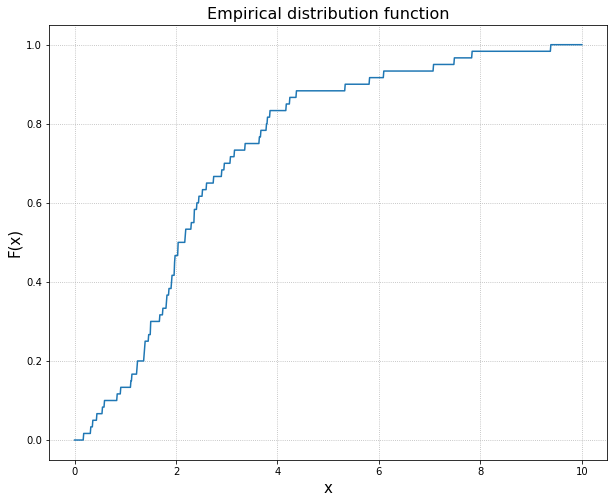

In [7]:
edf = lambda grid, smpl: np.array([len(sample[smpl < x]) / n for x in grid])
sorted_sample = np.sort(sample)
# print(edf(grid, sample))
grid = np.linspace(int(sorted_sample[0]), ceil(sorted_sample[-1]), 1000)

plt.figure(figsize=(10,8))
plt.plot(grid, edf(grid, sample))
plt.title('Empirical distribution function', fontsize=16)
plt.grid(ls=':')
plt.xlabel('x', fontsize=15)
plt.ylabel('F(x)', fontsize=15)
plt.show()

### Для использования критерия хи-квадрат подберем такое разбиение на интервалы, чтобы частоты попадания элементов выборки в интервалы были больше 5.

[0.17806556 0.31161687 0.35526998 0.4366424  0.54154897 0.58616777
 0.83373732 0.90979188 1.1036777  1.1286504  1.2273975  1.2388978
 1.3678309  1.3733023  1.3887417  1.4584889  1.4951332  1.4985633
 1.6729069  1.7414732  1.8054993  1.8175576  1.8550813  1.9058249
 1.9149072  1.9621465  1.9693777  1.979971   2.0375143  2.0402258
 2.1737967  2.1894662  2.2967959  2.3578568  2.3604825  2.4117325
 2.4476081  2.513246   2.6011661  2.7425887  2.8968079  2.9465026
 3.0708073  3.1524509  3.3539797  3.6413331  3.670338   3.7832059
 3.8029665  3.8500065  4.1662498  4.2427576  4.3650879  5.332609
 5.8103628  6.0873556  7.0672141  7.4784227  7.836419   9.3817367 ]
borders:  [0.17806556 1.2273975  2.01879979 3.3539797  6.0873556  9.3817367 ] 
num of intervals:  5 
counts:  [10 18 16 11  5]


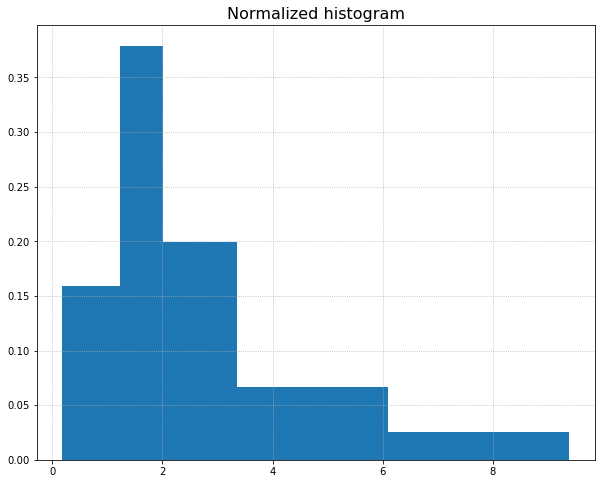

In [8]:
print(sorted_sample)
pretty_grid = np.array([0.17806556, 1.2273975, 2.01879979, 3.3539797, 6.0873556, 9.3817367])

plt.figure(figsize=(10,8))
plt.hist(sample, bins=pretty_grid, density=True)
plt.grid(ls=':')
plt.title('Normalized histogram', fontsize=16)

counts, bins = np.histogram(sample, bins=pretty_grid)
print("borders: ", bins, "\nnum of intervals: ", len(counts), "\ncounts: ", counts)
plt.show()

### 3. Построим доверительные полосы для теоретической функции распределения с доверительными вероятностями  0.90 и 0.95.

gamma = 0.9,  u_k = 1.2238478702170825
gamma = 0.95,  u_k = 1.3580986393225505


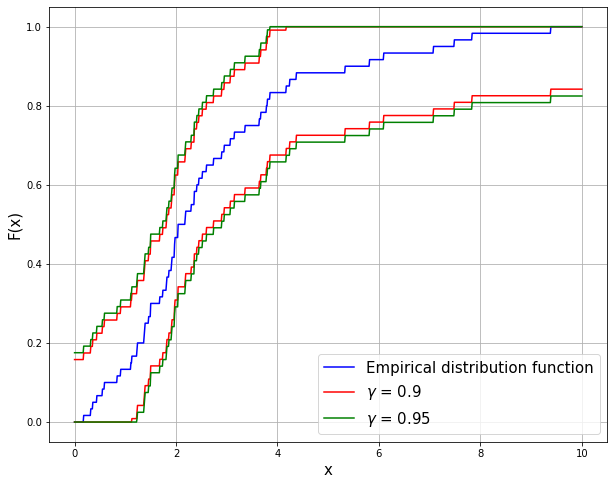

In [9]:
plt.figure(figsize=(10,8))
plt.plot(grid, edf(grid, sorted_sample), color='b', label='Empirical distribution function')

for gamma, clr in zip([0.9, 0.95], ['r', 'g']):
    u_k = sps.kstwobign.ppf(gamma)
    print(f"gamma = {gamma}, ", f"u_k = {u_k}")
    L = np.array([max(0, F - u_k / np.sqrt(n)) for F in edf(grid, sample)])
    R = np.array([min(F + u_k / np.sqrt(n), 1) for F in edf(grid, sample)])
    plt.plot(grid, L, color=clr, label=r"$\gamma$" + f" = {gamma}")
    plt.plot(grid, R, color=clr)

plt.grid()
plt.legend(prop={'size': 15})
plt.xlabel('x', fontsize=15)
plt.ylabel('F(x)', fontsize=15)
plt.show()

### 4-5. Выдвинем и проверим гипотезы о том, что случайная величина имеет гамма-распределение или хи квадрат.

In [10]:
from scipy.stats import gamma, chi2, expon
from scipy.optimize import minimize, Bounds

In [11]:
def theoretical_df_gamma(x, shape_param, scale_param):
    return gamma.cdf(x, a = shape_param, scale = scale_param)

def theoretical_df_chi2(x, k):
    return chi2.cdf(x, df=k)

theoretical_df_dict = {'gamma' : theoretical_df_gamma, 'chi2': theoretical_df_chi2}

In [12]:
def chi_2_value_R_2(theoretical_df, _counts, _bins, shape_param, scale_param):
    chi_2 = 0
    for j in range(len(_counts)):
        p_j = theoretical_df(_bins[j + 1], shape_param, scale_param) - theoretical_df(_bins[j], shape_param, scale_param)
        v_j = _counts[j]
        try:
            chi_2 += (v_j - n * p_j) ** 2 / (n * p_j)
        except Exception:
            print(f"p_j is zero = {p_j}")

    return chi_2

def chi_2_value_R_1(theoretical_df, _counts, _bins, deg_of_freedom):
    chi_2 = 0
    for j in range(len(_counts)):
        p_j = theoretical_df(_bins[j + 1], deg_of_freedom) - theoretical_df(_bins[j], deg_of_freedom)
        v_j = _counts[j]
        try:
            chi_2 += (v_j - n * p_j) ** 2 / (n * p_j)
        except Exception:
            print(f"p_j is zero = {p_j}")

    return chi_2

In [13]:
bnds_1 = Bounds(0, np.inf)
bnds_2 = Bounds([0, 0], [np.inf, np.inf])
chi2_2 = 5.99
chi2_3 = 7.81

def multi_max_likelihood_est(theoretical_df, _counts, _bins, init_value, dimension):
    if dimension == 1:
        chi_2 = lambda param: chi_2_value_R_1(theoretical_df, _counts, _bins, param)
        opt_res = minimize(chi_2, init_value, bounds=bnds_1, method='TNC')
        print(f"chi2 value: {opt_res['fun'][0]:.2f} < {chi2_3} ?   ", opt_res['fun'][0] < chi2_3, "\nmultinomial maximum likelihood estimation: ", opt_res['x'])
    else:
        chi_2 = lambda params: chi_2_value_R_2(theoretical_df, _counts, _bins, params[0], params[1])
        opt_res = minimize(chi_2, init_value, bounds=bnds_2, method='TNC')
        print(f"chi2 value: {opt_res['fun']:.2f} < {chi2_2} ?   " , opt_res['fun'] < chi2_2, "\nmultinomial maximum likelihood estimation: ", opt_res['x'])
    return opt_res['x']

In [14]:
counts, bins = np.histogram(sample, pretty_grid)
print("borders: ", bins, f"\nnum of intervals: {len(counts)}\n")

print("H0 = {Gamma distribution}")
multi_ml_est_gamma = multi_max_likelihood_est(theoretical_df_dict['gamma'], counts, bins, np.array([0.5, 1.0]), 2)

print("\nH0 = {Chi-square distribution}")
multi_ml_est_chi2 = multi_max_likelihood_est(theoretical_df_dict['chi2'], counts, bins, np.array([1]), 1)

borders:  [0.17806556 1.2273975  2.01879979 3.3539797  6.0873556  9.3817367 ] 
num of intervals: 5

H0 = {Gamma distribution}
chi2 value: 4.53 < 5.99 ?    True 
multinomial maximum likelihood estimation:  [2.17415495 1.28206221]

H0 = {Chi-square distribution}
chi2 value: 7.22 < 7.81 ?    True 
multinomial maximum likelihood estimation:  [3.00182637]


### 6. Оценим параметры гамма-распределения методом максимального правдоподобия

In [15]:
def shape_param_MLE(sample):
    s = log(np.mean(sample)) - sum(log(x) for x in sample) / n
    k = (3 - s + ((s - 3) ** 2 + 24 * s) ** 0.5) / (12 * s)
    return k

def scale_param_MLE(sample, shape_param_mle):
    theta = np.mean(sample) / shape_param_mle
    return theta

In [21]:
a_mle = shape_param_MLE(sample)
print(f"shape parameter: {a_mle}")
scale_mle = scale_param_MLE(sample, a_mle)
print(f"scale parameter: {scale_mle}")

a, loc, scale = gamma.fit(sample)
print(f"\nshape parameter: {a}")
print(f"scale parameter: {scale}")
print((a_mle - a) / a_mle)

shape parameter: 2.038669509625593
scale parameter: 1.3094108886029883

shape parameter: 1.8868928690464348
scale parameter: 1.3811703878501465
0.07444886964882909


### 7. Построим гипотетические теоретические кривые: функцию распределения и плотность вероятности.

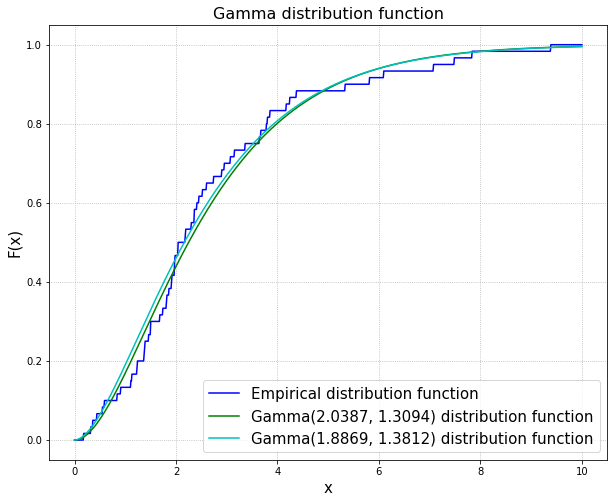

In [18]:
plt.figure(figsize=(10,8))
plt.plot(grid, edf(grid, sorted_sample), color='b', label='Empirical distribution function')
plt.plot(grid, gamma.cdf(grid, a=a_mle, scale=scale_mle), color='g', label=f'Gamma({a_mle:.4f}, {scale_mle:.4f}) distribution function')
plt.plot(grid, gamma.cdf(grid, a=a, scale=scale), color='c', label=f'Gamma({a:.4f}, {scale:.4f}) distribution function')
plt.grid(ls=':')
plt.xlabel('x', fontsize=15)
plt.ylabel('F(x)', fontsize=15)
plt.legend(prop={'size': 15})
plt.title(f'Gamma distribution function', fontsize=16)
plt.show()

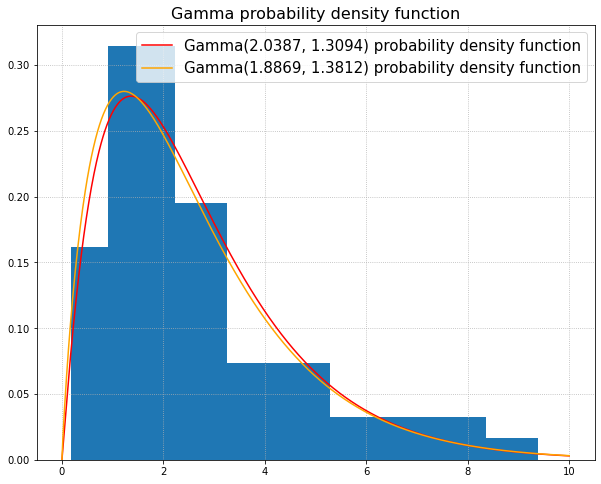

In [23]:
beauty_density = np.array([0.17806556, 0.9, 2.22332581, 3.24595594, 5.29121619, 7.33647645, 8.35910657, 9.3817367])

plt.figure(figsize=(10,8))
plt.hist(sample, bins=beauty_density, density=True)
plt.plot(grid, gamma.pdf(grid, a=a_mle, scale=scale_mle), color='r', label=f'Gamma({a_mle:.4f}, {scale_mle:.4f}) probability density function')
plt.plot(grid, gamma.pdf(grid, a=a, scale=scale), color='orange', label=f'Gamma({a:.4f}, {scale:.4f}) probability density function')
plt.grid(ls=':')
plt.legend(prop={'size': 15})
plt.title(f'Gamma probability density function', fontsize=16)
plt.show()

In [37]:
mean, var, skew, kurt = gamma.stats(a=a_mle, scale=scale_mle, moments='mvsk')
print(f"ОМП, полученные по примерным формулам: ({a_mle:.2f}, {scale_mle:.2f})")
print(f"gamma mean: {mean} / sample mean: {sample_mean}")
print(f"gamma var: {var} / sample var: {sample_var}")
print(f"gamma skewness: {skew} / sample skewness: {sample_skewness}")
print(f"gamma kurtoses: {kurt} / sample kurtoses: {sample_kurtoses}")

lib_mean, lib_var, lib_skew, lib_kurt = gamma.stats(a=1.7, scale=1.5, moments='mvsk')
print(f"\nОМП, полученные встроенной функцией: ({a:.2f}, {scale:.2f})")
print(f"gamma mean: {lib_mean} / sample mean: {sample_mean}")
print(f"gamma var: {lib_var} / sample var: {sample_var}")
print(f"gamma skewness: {lib_skew} / sample skewness: {sample_skewness}")
print(f"gamma kurtoses: {lib_kurt} / sample kurtoses: {sample_kurtoses}")

ОМП, полученные по примерным формулам: (2.04, 1.31)
gamma mean: 2.669456054166666 / sample mean: 2.6694560541666665
gamma var: 3.495414823973001 / sample var: 3.6881836517453213
gamma skewness: 1.4007369396618037 / sample skewness: 1.4866686622370526
gamma kurtoses: 2.9430959611996728 / sample kurtoses: 2.1279393830448443

ОМП, полученные встроенной функцией: (1.89, 1.38)
gamma mean: 2.55 / sample mean: 2.6694560541666665
gamma var: 3.8249999999999997 / sample var: 3.6881836517453213
gamma skewness: 1.5339299776947408 / sample skewness: 1.4866686622370526
gamma kurtoses: 3.5294117647058822 / sample kurtoses: 2.1279393830448443
